# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
data_df = pd.read_csv('food_claims_2212.csv')
data_df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


## Task 1



In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
data_df.location.unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [6]:
data_df.cause.unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

### 1. a.
With the result of info() function above, we can see:
- Claim_id is an integer so not nominal. We have convert it into string value
- time_to_close has the right datatype
- claim_amount is an object, so not conitnuous, we have to convert it into float
- amount_paid: right data type but missing values
- location: right data type and also all values match the ones describe in the desription of the project
- individuals_on_claim: right data type
- linked_cases: right data type but also missing values
- cause: right data type. But contains same type but with different writing (case sensitive). We have to uniform all the types.

In [10]:
data_df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

### 1. b.
With the result above, we can see that: 
- claim_id, time_to_lose, claim_amount, location, individuals_on_claim, cause do not have missing values

However:
- amount_paid has 36 missing values
- linked_cases has 26 missing values

In [ ]:
# Convert claim_id to str
data_df['claim_id'] = data_df['claim_id'].astype(str)

# Convert claim_amount into float and round with 2 decimal places
data_df['claim_amount'] = np.round(data_df['claim_amount'].str.replace('R$', '', regex=False).str.strip().astype(float), 2)

# Make sure amount_paid is 2 decimal places
data_df['amount_paid'] = np.round(data_df['amount_paid'].fillna(data_df['amount_paid'].median()))

# Fill missing with False in linked_cases
data_df['linked_cases'] = data_df['linked_cases'].fillna('False')

# Format cause                 
replace_dict = {'Meat': 'meat', 'VEGETABLES': 'vegetable'}
data_df['cause']  = data_df['cause'].str.strip().replace(replace_dict)

### 1. c.
What I did:
- Convert claim_id to str to make it nominal
- Convert claim_amoount to be countinous by removing 'R$', convert it to float and then make round at 2 decimal palces
- Fill missing values in amount_paid by the median and then make a round  with 2 decimal places
- Fill missing values in linked_cases with 'False'
- Replace Meat with meat and VEGETABLES with vegetable in cause column

## Task 2

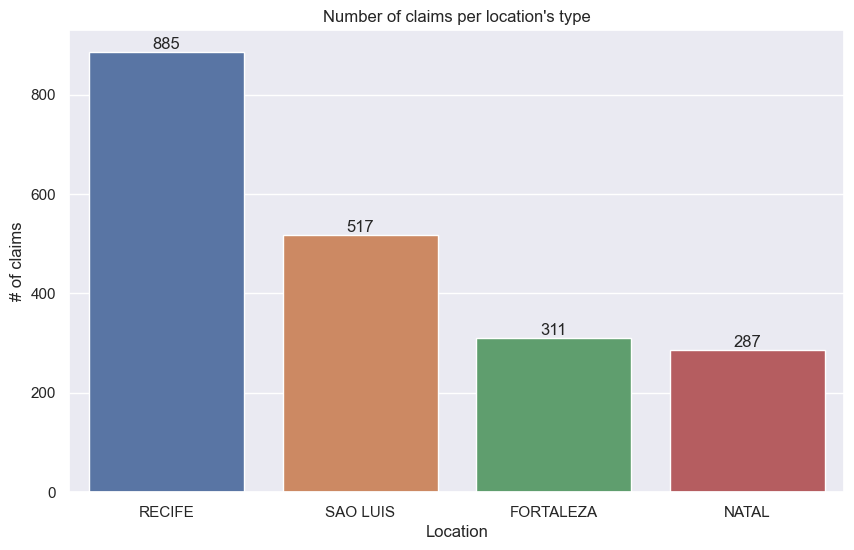

In [11]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data = data_df, 
              x='location',
              order = data_df['location'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.ylabel('# of claims')
plt.xlabel('Location')
plt.title("Number of claims per location's type")
plt.show()

We used bar chart to see the number of claims for each location encoded with color for a better differenciation of locations.
### 2. a.
With the chart above, we can see that, it's RECIFE which has the highest number of claims, follow by SAO LUIS, then FORTALEZA and at the end NATAL.

### 2. b.
We can observe in the above chart that RECIPE has alone about 44.25% of the overall claims, which is a bit hight since we have 4 different types of location. Howerver if we look the other locations, we can see that they are somewhat balanced, 25.85% for SAO LUIS, 15.55% for FORTALEZA and  14.35 for NATAL.

## Task 3

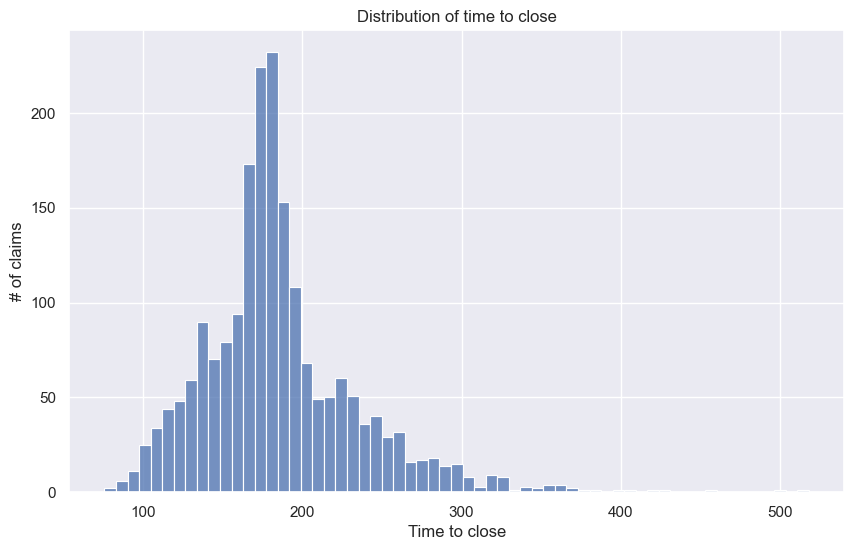

In [12]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data = data_df, x = 'time_to_close')
plt.ylabel('# of claims')
plt.xlabel('Time to close')
plt.title('Distribution of time to close')
plt.show()

The histogram is a great chart we can use to see distribution of a variable.

We can notice  that the distribution of time_to_close seems to follows normal distribution's one.
We also see that most of the values ​​are concentrated towards the left so we can also say that it is a right-skewed distribution

## Task 4

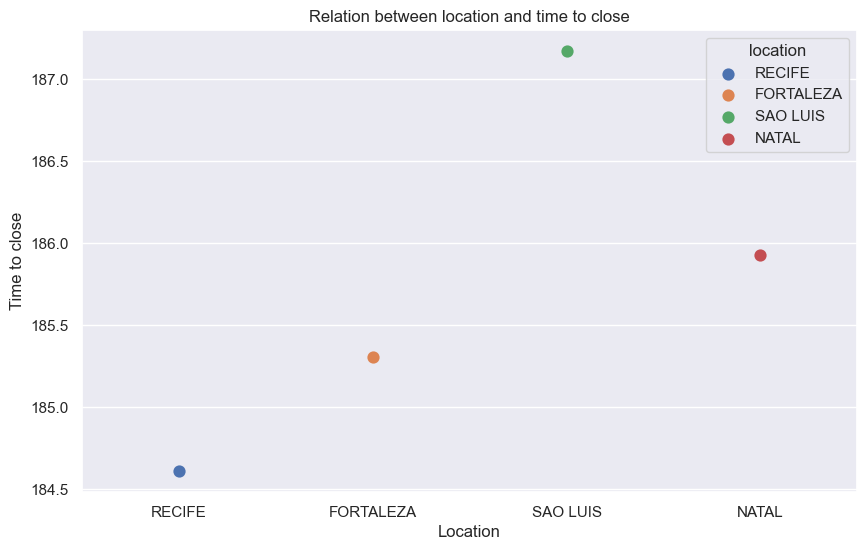

In [13]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(data = data_df, y = 'time_to_close', x='location', errorbar = None, hue='location')
plt.xlabel('Location')
plt.ylabel('Time to close')
plt.title('Relation between location and time to close')
plt.show()

Here, we used a pointplot, which is an alternative of scatter plot to show a relationship between categorical and countinous variable.

Wiht this chart, We can see that despite the fact that RECIFE has the most number of claims, it is however SAO LUIS which has on average, the highest time to close, follow by NATAL, then FORTALEZA and at the end RECIFE.
So on average, it's take  more time to close a claims on SAO LUIS than the other locations.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam